<a href="https://colab.research.google.com/github/AsmaaAlghamd1/Asmaa_INFO5731_-Spring2021/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [28]:
# Write your code here
import json
import pandas as pd
import spacy
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import os.path
from gensim import corpora, models
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:

df = pd.read_csv('/content/List_Tweets (20).csv')

In [30]:
df

,Tweets,Sentimental Analysis
0,bYA GIRL GOT STABBEDnnCOVIDvaccine JohnsonAndJ...,Neutral
1,bEveryone should read this COVID HerdImmunity ...,Neutral
2,bGot my dose johnsonandjohnson COVIDvaccine to...,Positive
3,bThis morning we trained medical and physician...,Positive
4,bHypocrisy of all hypocrisies facebook censor...,Neutral
...,...,...
99,bVaccine done And in case youre curious I con...,Positive
100,bEnd of Day after st Covid Vaccine Arm pain n...,Positive
101,bICYMIThisxfxfxxxfxfxfxbb COVID is still ragin...,Positive
102,bFeeling great after Pfizer dose one yesterday...,Positive


In [31]:
#preprocessing 
df['Lower Case'] = df['Tweets'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
Tokenizer = RegexpTokenizer(r'\w+')
df['Tokenization'] = df['Lower Case'].apply(lambda x: Tokenizer.tokenize(x))
en_stop = set(nltk.corpus.stopwords.words('english'))
df['Tokens'] = df['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
Stemmer = PorterStemmer()
df['Stemming'] = df['Tokens'].apply(lambda x: [Stemmer.stem(i) for i in x])

In [32]:
df

,Tweets,Sentimental Analysis,Lower Case,Tokenization,Tokens,Stemming
0,bYA GIRL GOT STABBEDnnCOVIDvaccine JohnsonAndJ...,Neutral,bya girl got stabbednncovidvaccine johnsonandj...,"[bya, girl, got, stabbednncovidvaccine, johnso...","[bya, girl, got, stabbednncovidvaccine, johnso...","[bya, girl, got, stabbednncovidvaccin, johnson..."
1,bEveryone should read this COVID HerdImmunity ...,Neutral,beveryone should read this covid herdimmunity ...,"[beveryone, should, read, this, covid, herdimm...","[beveryone, read, covid, herdimmunity, covidva...","[beveryon, read, covid, herdimmun, covidvaccin..."
2,bGot my dose johnsonandjohnson COVIDvaccine to...,Positive,bgot my dose johnsonandjohnson covidvaccine to...,"[bgot, my, dose, johnsonandjohnson, covidvacci...","[bgot, dose, johnsonandjohnson, covidvaccine, ...","[bgot, dose, johnsonandjohnson, covidvaccin, t..."
3,bThis morning we trained medical and physician...,Positive,bthis morning we trained medical and physician...,"[bthis, morning, we, trained, medical, and, ph...","[bthis, morning, trained, medical, physician, ...","[bthi, morn, train, medic, physician, student,..."
4,bHypocrisy of all hypocrisies facebook censor...,Neutral,bhypocrisy of all hypocrisies facebook censors...,"[bhypocrisy, of, all, hypocrisies, facebook, c...","[bhypocrisy, hypocrisies, facebook, censors, m...","[bhypocrisi, hypocrisi, facebook, censor, mark..."
...,...,...,...,...,...,...
99,bVaccine done And in case youre curious I con...,Positive,bvaccine done and in case youre curious i conf...,"[bvaccine, done, and, in, case, youre, curious...","[bvaccine, done, case, youre, curious, confirm...","[bvaccin, done, case, your, curiou, confirm, d..."
100,bEnd of Day after st Covid Vaccine Arm pain n...,Positive,bend of day after st covid vaccine arm pain no...,"[bend, of, day, after, st, covid, vaccine, arm...","[bend, day, st, covid, vaccine, arm, pain, sli...","[bend, day, st, covid, vaccin, arm, pain, slig..."
101,bICYMIThisxfxfxxxfxfxfxbb COVID is still ragin...,Positive,bicymithisxfxfxxxfxfxfxbb covid is still ragin...,"[bicymithisxfxfxxxfxfxfxbb, covid, is, still, ...","[bicymithisxfxfxxxfxfxfxbb, covid, still, ragi...","[bicymithisxfxfxxxfxfxfxbb, covid, still, rage..."
102,bFeeling great after Pfizer dose one yesterday...,Positive,bfeeling great after pfizer dose one yesterday...,"[bfeeling, great, after, pfizer, dose, one, ye...","[bfeeling, great, pfizer, dose, one, yesterday...","[bfeel, great, pfizer, dose, one, yesterday, t..."


In [33]:
line = []
for i in range(0,len(df['Stemming'])):
  line+= df['Stemming'][i]
print(line)

['bya', 'girl', 'got', 'stabbednncovidvaccin', 'johnsonandjohnsonvaccin', 'httpstcoopncmqod', 'beveryon', 'read', 'covid', 'herdimmun', 'covidvaccin', 'nhttpstcoywyqvylxwu', 'bgot', 'dose', 'johnsonandjohnson', 'covidvaccin', 'today', 'cri', 'relief', 'got', 'thankyoumrpresid', 'joebiden', 'bthi', 'morn', 'train', 'medic', 'physician', 'student', 'give', 'covidvaccin', 'afternoon', 'daughter', 'gotxexxa', 'httpstcoczsdihkeq', 'bhypocrisi', 'hypocrisi', 'facebook', 'censor', 'mark', 'zuckerberg', 'nnzuck', 'got', 'zuck', 'nnxfxfxxxfxfxxxfxfxxxfxfxxxfxfxxxfxfxxxfxfxxxfxfxxncovidvaccinexexxa', 'httpstcowptmrxyxf', 'bplz', 'stayhomexcxaxefxbfxbc', 'wearamaskxcxaxefxbfxbc', 'socialdist', 'washyourhandsxcxaxefxbfxbc', 'nnletxexx', 'pull', 'togeth', 'bematur', 'ampxexxa', 'httpstcoyskomzp', 'bthe', 'busi', 'save', 'live', 'doesnxexxt', 'stop', 'holiday', 'weekend', 'xfxfxxxfxfxxxfxfxxbetterdaysarecom', 'betterdaysareherexexxa', 'httpstcoiipblxqamn', 'b', 'cv', 'locat', 'show', 'covidvaccin', 

In [ ]:
#Bigrams and Trigrams


In [34]:
Data = []
for line in df['Stemming']:
  Data.append(line)

In [35]:
bigram = models.Phrases(Data, min_count=5, threshold=100)
trigram = models.Phrases(bigram[Data], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[Data[0]]])

['bya', 'girl', 'got', 'stabbednncovidvaccin', 'johnsonandjohnsonvaccin', 'httpstcoopncmqod']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [36]:
def Bigrams(Data):
    return [bigram_mod[doc] for doc in Data]
  
def Trigrams(Data):
    return [trigram_mod[bigram_mod[doc]] for doc in Data]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    output= []
    for i in Data:
        doc = nlp(" ".join(i)) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output

In [37]:
Bigrams_Data = Bigrams(Data)
nlp = spacy.load('en', disable=['parser', 'ner'])
Lemma = lemmatization(Bigrams_Data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(Lemma[:10])

[['get'], ['read', 'herdimmun', 'covidvaccin', 'nhttpstcoywyqvylxwu'], ['today', 'cri', 'relief', 'get'], ['student', 'give', 'covidvaccin', 'afternoon'], ['get'], [], ['save', 'live', 'doesnxexxt', 'weekend'], ['show', 'covidvaccin', 'slot'], ['aid', 'show', 'covidvaccin', 'slot'], ['bgovern', 'californian', 'age', 'year', 'old', 'elig', 'covidvaccin', 'week']]


In [38]:
id2word = corpora.Dictionary(Lemma)
Text1 = Lemma
corpus = [id2word.doc2bow(text) for text in Text1]
print(corpus[:10])

[[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (5, 1), (6, 1), (7, 1)], [(1, 1), (8, 1), (9, 1), (10, 1)], [(0, 1)], [], [(11, 1), (12, 1), (13, 1), (14, 1)], [(1, 1), (15, 1), (16, 1)], [(1, 1), (15, 1), (16, 1), (17, 1)], [(1, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]]


In [41]:
id2word[1]

'covidvaccin'

In [40]:
id2word[0]

'get'

In [42]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

[[('get', 1)],
 [('covidvaccin', 1),
  ('herdimmun', 1),
  ('nhttpstcoywyqvylxwu', 1),
  ('read', 1)],
 [('get', 1), ('cri', 1), ('relief', 1), ('today', 1)],
 [('covidvaccin', 1), ('afternoon', 1), ('give', 1), ('student', 1)],
 [('get', 1)],
 [],
 [('doesnxexxt', 1), ('live', 1), ('save', 1), ('weekend', 1)],
 [('covidvaccin', 1), ('show', 1), ('slot', 1)],
 [('covidvaccin', 1), ('show', 1), ('slot', 1), ('aid', 1)],
 [('covidvaccin', 1),
  ('age', 1),
  ('bgovern', 1),
  ('californian', 1),
  ('elig', 1),
  ('old', 1),
  ('week', 1),
  ('year', 1)]]

In [43]:
data2 = ''
for i in range(0,len(df['Tweets'])):
  data2+= df['Tweets'][i]
print(data2)

nltk.download('punkt')
words = nltk.word_tokenize(data2)

Trigramss = nltk.trigrams(words)
freqT = nltk.FreqDist(Trigramss)
freqT

bYA GIRL GOT STABBEDnnCOVIDvaccine JohnsonAndJohnsonVaccine httpstcoOpNcmqOdbEveryone should read this COVID HerdImmunity COVIDvaccine nhttpstcoyWYQvYlxWubGot my dose johnsonandjohnson COVIDvaccine today Cried with relief when I got it ThankyouMrPresident JoeBidenbThis morning we trained medical and physician students how to give COVIDvaccine and this afternoon my daughter gotxexxa httpstcoCZsdiHkEQbHypocrisy of all hypocrisies  facebook censors Mark Zuckerberg nnZuck got Zucked nnxfxfxxxfxfxxxfxfxxxfxfxxxfxfxxxfxfxxxfxfxxxfxfxxncovidvaccinexexxa httpstcoWpTMRxyxfbPlz StayHomexcxaxefxbfxbc WearAMaskxcxaxefxbfxbc SocialDistance WashYourHandsxcxaxefxbfxbc nnLetxexxs all pull together BeMature ampxexxa httpstcoYSkOMZPbThe business of savings lives doesnxexxt stop on holiday weekends xfxfxxxfxfxxxfxfxxBetterDaysAreComing BetterdaysAreHerexexxa httpstcoIIpBLxqamnb CVS locations show CovidVaccine slots in CAnArvinnBakersfieldnChiconClovisnFresnonMaderanPalm SpringsnPortervixexxa httpstcotNYr

FreqDist({('bYA', 'GIRL', 'GOT'): 1,
          ('GIRL', 'GOT', 'STABBEDnnCOVIDvaccine'): 1,
          ('GOT', 'STABBEDnnCOVIDvaccine', 'JohnsonAndJohnsonVaccine'): 1,
          ('STABBEDnnCOVIDvaccine',
           'JohnsonAndJohnsonVaccine',
           'httpstcoOpNcmqOdbEveryone'): 1,
          ('JohnsonAndJohnsonVaccine',
           'httpstcoOpNcmqOdbEveryone',
           'should'): 1,
          ('httpstcoOpNcmqOdbEveryone', 'should', 'read'): 1,
          ('should', 'read', 'this'): 1,
          ('read', 'this', 'COVID'): 1,
          ('this', 'COVID', 'HerdImmunity'): 1,
          ('COVID', 'HerdImmunity', 'COVIDvaccine'): 1,
          ('HerdImmunity', 'COVIDvaccine', 'nhttpstcoyWYQvYlxWubGot'): 1,
          ('COVIDvaccine', 'nhttpstcoyWYQvYlxWubGot', 'my'): 1,
          ('nhttpstcoyWYQvYlxWubGot', 'my', 'dose'): 1,
          ('my', 'dose', 'johnsonandjohnson'): 1,
          ('dose', 'johnsonandjohnson', 'COVIDvaccine'): 1,
          ('johnsonandjohnson', 'COVIDvaccine', 'today'): 1

# LDA model

In [44]:
lDmodel = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [45]:
from pprint import pprint
pprint(lDmodel.print_topics())
IDM1 = lDmodel[corpus]

[(0,
  '0.029*"covidvaccin" + 0.027*"would" + 0.019*"fight" + 0.019*"thank" + '
  '0.019*"drink" + 0.019*"govern" + 0.010*"bottl" + 0.010*"student" + '
  '0.010*"ask" + 0.010*"write"'),
 (1,
  '0.030*"covidvaccin" + 0.021*"week" + 0.021*"open" + 0.021*"dose" + '
  '0.011*"counti" + 0.011*"day" + 0.011*"administ" + 0.011*"httpstcoebfdcqjn" '
  '+ 0.011*"liter" + 0.011*"fire"'),
 (2,
  '0.283*"month" + 0.033*"shoot" + 0.017*"get" + 0.017*"progress" + '
  '0.009*"bget" + 0.009*"live" + 0.009*"followersnntoday" + 0.009*"plea" + '
  '0.009*"airqual" + 0.009*"httpstconcxivhxqx"'),
 (3,
  '0.013*"difficult" + 0.013*"book" + 0.013*"high" + 0.013*"beat" + '
  '0.013*"centr" + 0.013*"good" + 0.013*"extend" + 0.013*"process" + '
  '0.013*"confu" + 0.013*"check"'),
 (4,
  '0.142*"vaccin" + 0.128*"yesterday" + 0.071*"dose" + 0.064*"tini" + '
  '0.064*"bite" + 0.064*"bit" + 0.064*"forget" + 0.064*"accident" + '
  '0.064*"slight" + 0.064*"pain"'),
 (5,
  '0.048*"covidvaccin" + 0.025*"year" + 0.017*"g

In [46]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lDmodel.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lDmodel, texts=Lemma, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.912898091651871

Coherence Score:  0.4704970595488821


In [ ]:
# LSA

In [47]:
lSamodel = models.LsiModel(corpus, num_topics = 20, id2word = id2word)
pprint(lSamodel.print_topics(num_topics = 20))

[(0,
  '0.769*"covidvaccin" + 0.369*"show" + 0.369*"slot" + 0.187*"aid" + '
  '0.114*"centronfresnonmaderanpalm" + 0.106*"vaccin" + 0.079*"dose" + '
  '0.076*"canarvinnbakersfieldnclovisnel" + 0.073*"week" + '
  '0.073*"canarvinnbakersfieldnchiconclovisnel"'),
 (1,
  '0.822*"vaccin" + 0.164*"covid" + 0.133*"appoint" + 0.121*"feel" + '
  '-0.108*"slot" + -0.108*"show" + 0.105*"dose" + 0.092*"make" + 0.091*"avail" '
  '+ 0.088*"hour"'),
 (2,
  '-0.398*"slot" + -0.398*"show" + 0.309*"covidvaccin" + 0.299*"week" + '
  '0.265*"dose" + -0.205*"aid" + 0.194*"year" + 0.168*"old" + 0.168*"age" + '
  '0.168*"elig"'),
 (3,
  '-0.681*"get" + -0.297*"shoot" + 0.282*"dose" + -0.175*"happi" + '
  '-0.161*"today" + -0.143*"first" + -0.135*"feel" + 0.128*"progress" + '
  '-0.106*"great" + -0.100*"barbwir"'),
 (4,
  '-0.427*"feel" + 0.345*"get" + 0.285*"dose" + -0.234*"great" + -0.200*"say" '
  '+ -0.167*"brilliant" + -0.164*"today" + -0.150*"system" + 0.148*"shoot" + '
  '-0.145*"far"'),
 (5,
  '-0.580

In [49]:
CoVal = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus, num_topics = 20, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = df['Stemming'], dictionary = id2word, coherence='c_v')
  CoVal.append(coherencemodel.get_coherence())

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [ ]:
Val = range(2, 12, 1)
plt.plot(Val,CoVal)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence values"), loc='best')
plt.show()

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

Neutral      39
Positive     38
Negative     26
Negative      1
Name: Sentimental Analysis, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


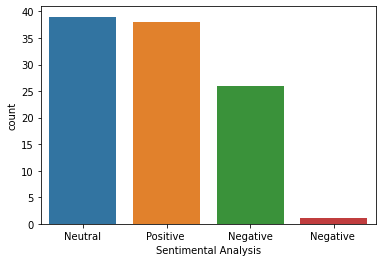

In [54]:
# Write your code here
import seaborn as sns
print(df['Sentimental Analysis'].value_counts())
sns.countplot(df['Sentimental Analysis'])




In [55]:
from nltk.corpus import stopwords
from textblob import TextBlob
stop = stopwords.words('english')
df['Cleaned Tweets'] = df['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Cleaned Tweets'] = df['Cleaned Tweets'].str.replace('[^\w\s]','')
df['Cleaned Tweets'] = df['Cleaned Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
# Using Tdidf Vector
Tfidfvector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tfidfvector.fit(df['Tweets'])
x_values = Tfidfvector.transform(df['Tweets'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(df['Sentimental Analysis'])

X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size=0.2)

In [57]:
#Naive Bayes
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predicted_nb = nb.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted_nb)))
report_nb = classification_report(y_test, predicted_nb, output_dict=True)
report_nb

Accuracy score is 0.09523809523809523


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 4},
 '2': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 14},
 '3': {'f1-score': 0.18181818181818182,
  'precision': 0.10526315789473684,
  'recall': 0.6666666666666666,
  'support': 3},
 'accuracy': 0.09523809523809523,
 'macro avg': {'f1-score': 0.06060606060606061,
  'precision': 0.03508771929824561,
  'recall': 0.2222222222222222,
  'support': 21},
 'weighted avg': {'f1-score': 0.025974025974025972,
  'precision': 0.015037593984962405,
  'recall': 0.09523809523809523,
  'support': 21}}

In [58]:
#SVM
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
predicted = svm_model.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted)))
report = classification_report(y_test, predicted, output_dict=True)
report

Accuracy score is 0.19047619047619047


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 4},
 '2': {'f1-score': 0.22222222222222224,
  'precision': 0.5,
  'recall': 0.14285714285714285,
  'support': 14},
 '3': {'f1-score': 0.2,
  'precision': 0.11764705882352941,
  'recall': 0.6666666666666666,
  'support': 3},
 'accuracy': 0.19047619047619047,
 'macro avg': {'f1-score': 0.14074074074074075,
  'precision': 0.2058823529411765,
  'recall': 0.2698412698412698,
  'support': 21},
 'weighted avg': {'f1-score': 0.17671957671957672,
  'precision': 0.35014005602240894,
  'recall': 0.19047619047619047,
  'support': 21}}

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [2]:
import csv
import pandas as pd

import matplotlib.pyplot as plt

Train = pd.read_csv("/content/train.csv")
Test = pd.read_csv("/content/test.csv")

In [59]:
Train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,4,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,...,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,1,2,8,4,208500
1,2,0,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,...,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,4,1,8,4,181500
2,3,5,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,4,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,...,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,8,2,8,4,223500
3,4,6,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,4,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,...,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,1,0,8,0,140000
4,5,5,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,4,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,...,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,11,2,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,5,3,62.0,7917,1,2,3,3,0,4,0,8,2,2,0,5,6,4,1999,2000,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0,5,0,953,953,1,...,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,4,1,1999.0,1,2,460,4,4,2,0,40,0,0,0,0,3,4,4,0,7,1,8,4,175000
1456,1457,0,3,85.0,13175,1,2,3,3,0,4,0,14,2,2,0,2,6,5,1978,1988,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790,4,163,589,1542,1,...,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,4,1,1978.0,2,2,500,4,4,2,349,0,0,0,0,0,3,2,4,0,1,4,8,4,210000
1457,1458,6,3,66.0,9042,1,2,3,3,0,4,0,6,2,2,0,5,7,8,1941,2006,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275,5,0,877,1152,1,...,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,1,1,252,4,4,2,0,60,0,0,0,0,3,0,2,2500,4,4,8,4,266500
1458,1459,0,3,68.0,9717,1,2,3,3,0,4,0,12,2,2,0,2,5,5,1950,1996,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49,4,1029,0,1078,1,...,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,5,1,1950.0,2,1,240,4,4,2,366,0,112,0,0,0,3,4,4,0,3,4,8,4,142125


In [3]:
Train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
matrix1 = Train.corr()
matrix1["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

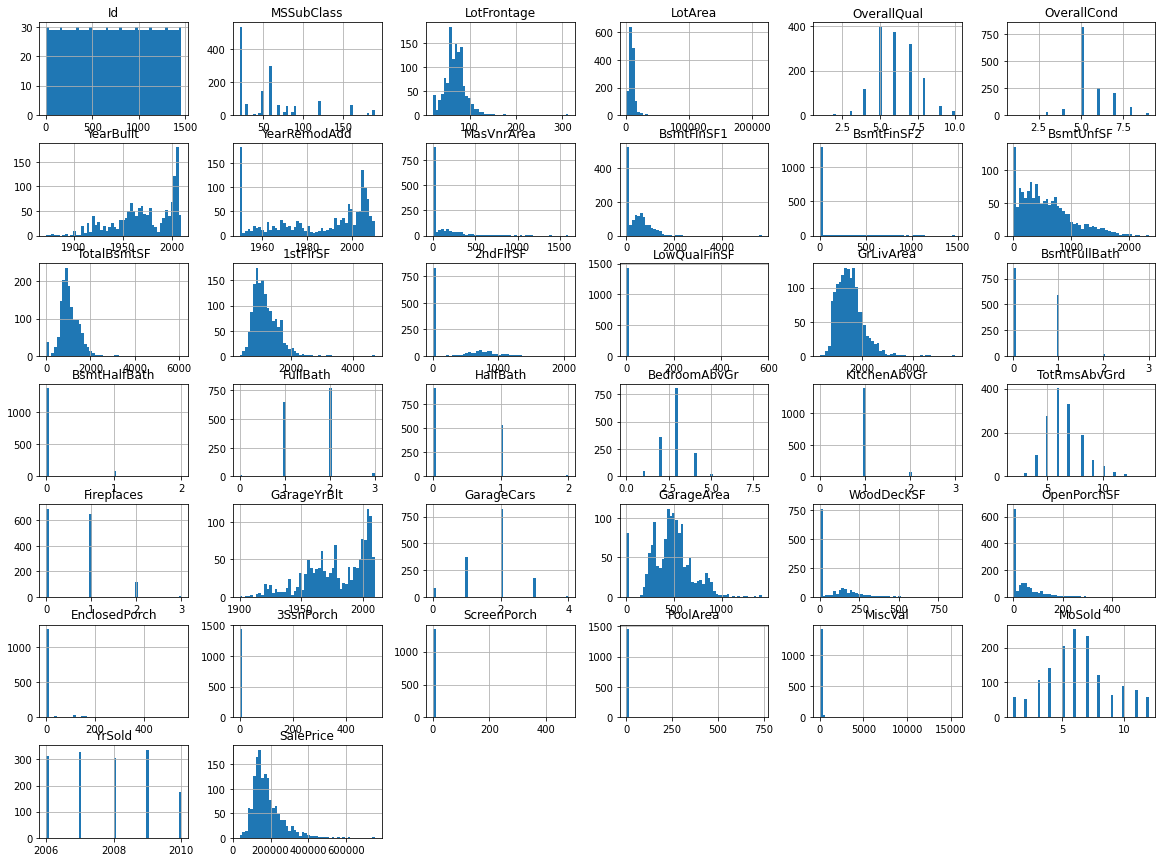

In [5]:
Train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

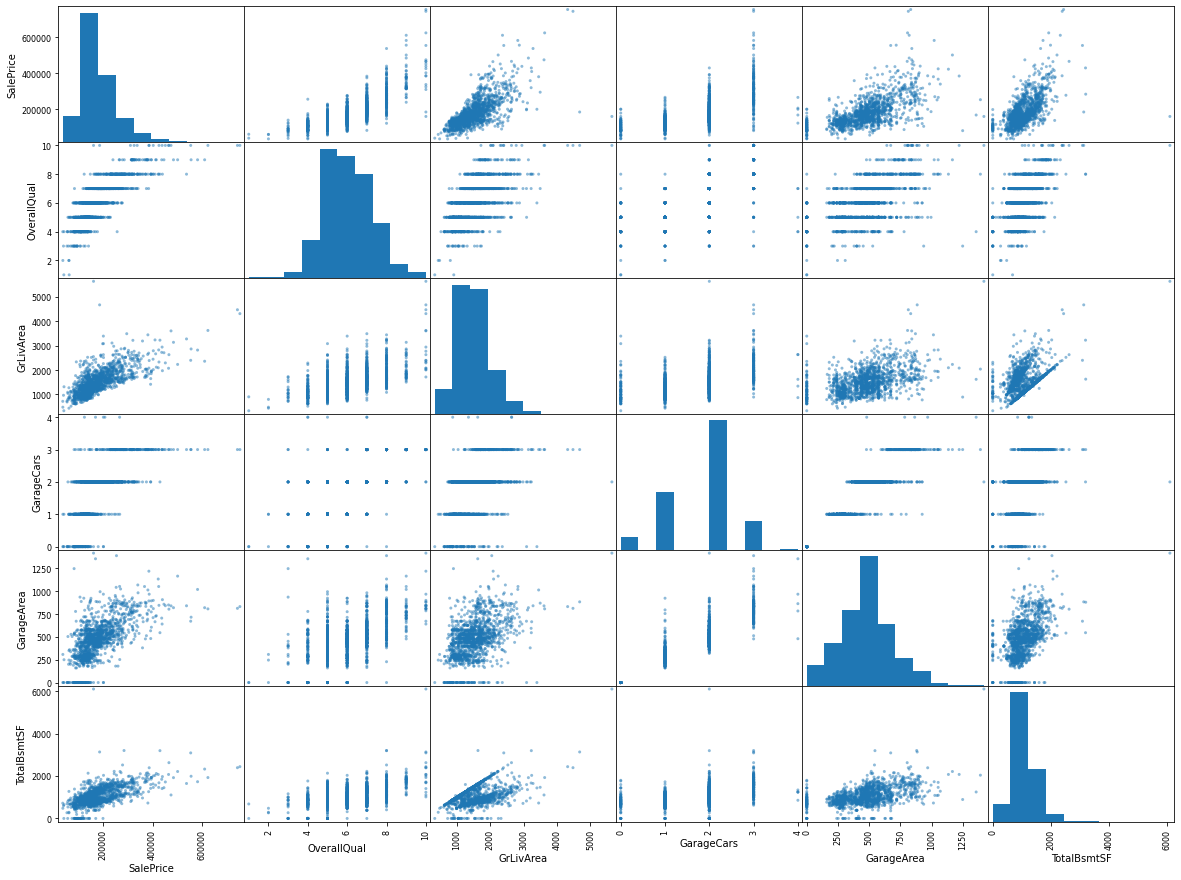

In [61]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", 'GarageArea', 'TotalBsmtSF']
scatter_matrix(Train[attributes], figsize=(20, 15))
plt.savefig('matrix.png')

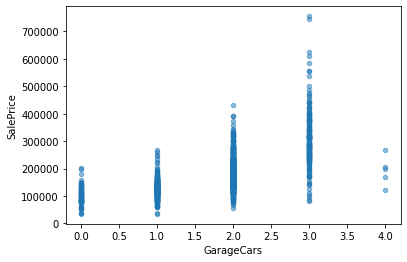

In [6]:
Train.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)


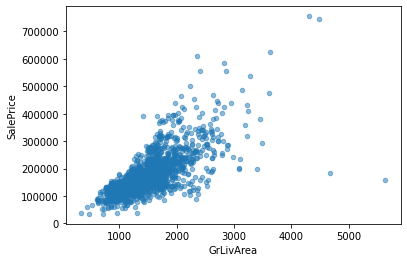

In [63]:
Train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)


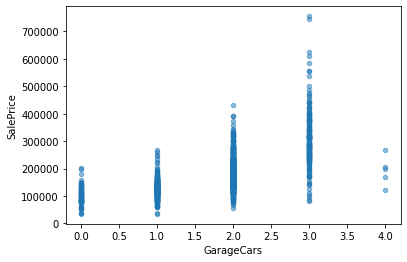

In [64]:
Train.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)


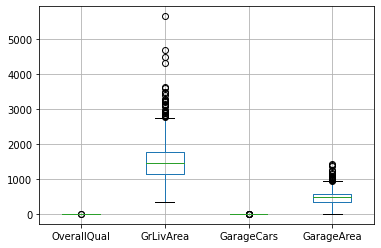

In [7]:
Train.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])


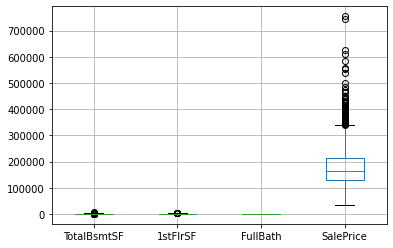

In [65]:
Train.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

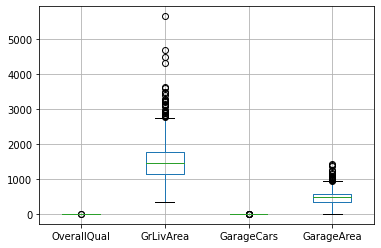

In [66]:
Train.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

In [10]:
Train.fillna(Train.mean(), inplace = True)
Train.fillna(Test.mean(), inplace = True)
print(Train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    LableEncode = LabelEncoder()
    LableEncode.fit(list(Train[column].values))
    Train[column] = LableEncode.transform(list(Train[column].values))



In [14]:
for column in columns:
    Testencode = LabelEncoder()
    Testencode.fit(list(Test[column].values))
    Test[column] = Testencode.transform(list(Test[column].values))

In [16]:
x_values = Train[Train.columns[:80]] 
x_test_values = Train[Test.columns[:80]]
y_values = Train['SalePrice']

In [18]:
import numpy as np
import pandas as pd

from  sklearn import linear_model

from sklearn.linear_model import LinearRegression

In [21]:
Modelxy = LinearRegression()
Modelxy.fit(x_values, y_values)
Modelxy.score(x_values, y_values)

0.8548395143943592

In [22]:
predicted = Modelxy.predict(x_test_values)
pd.DataFrame({'Predicted Price': predicted})

,Predicted Price
0,216004.918807
1,201597.311977
2,219063.994904
3,173108.505444
4,288552.677811
...,...
1455,168059.723478
1456,217940.209949
1457,244983.608816
1458,149990.835360
